Sales Insights Dashboard Using SQL and Python

You work for a small e-commerce company that stores its sales data in a relational database (like SQLite). Your goal is to:

Explore and clean the data

Write SQL queries to answer business questions

Use Python to visualize insights

Prepare clean datasets that could later be used for ML (e.g., predicting future sales)

✅ Objectives

1) Load sales data into SQLite using SQLAlchemy

2) Write SQL queries to answer questions like:

    - What are the top-selling products?

    - Which customers spend the most?

    - How does sales vary by month or region?

3) Use Python (Pandas) to process query results

4) Visualize data using matplotlib or seaborn

5) Export cleaned tables for later ML use

In [1]:
import sys
import os

# Add the parent folder of notebooks (the project root) to sys.path
project_root = os.path.abspath('..')
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from scripts.db_loader import SalesDB

In [2]:
# 1) Load sales data into SQLite using SQLAlchemy
db = SalesDB('../data/superstore.csv', 'orders')

db_file_name: ../data/superstore.db     csv_path ../data/superstore.csv
Database ../data/superstore.db already exists. Skipping CSV load


In [3]:
# 2) SQL queries
# a) Top selling products
top_x_products_num = 10
top_products = db.get_top_popular_products(top_x_products_num)
print(f"\nTop {top_x_products_num} products:")
for item in top_products:
    print(f"{item}")

2025-07-03 16:45:42,156 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-07-03 16:45:42,157 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("orders")
2025-07-03 16:45:42,157 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-07-03 16:45:42,158 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')
2025-07-03 16:45:42,158 INFO sqlalchemy.engine.Engine [raw sql] ('orders',)
2025-07-03 16:45:42,159 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("orders")
2025-07-03 16:45:42,159 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-07-03 16:45:42,161 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("orders")
2025-07-03 16:45:42,161 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-07-03 16:45:42,161 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'vie

In [4]:
# b) Which customers spend the most
top_x_spenders = 3
top_spender_ids = db.get_top_spenders(top_x_spenders)
print(f"\nTop {top_x_products_num} spenders IDs:")
for id in top_spender_ids:
    print(f"{id}")

2025-07-03 16:45:42,189 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-07-03 16:45:42,189 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("orders")
2025-07-03 16:45:42,190 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-07-03 16:45:42,190 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')
2025-07-03 16:45:42,191 INFO sqlalchemy.engine.Engine [raw sql] ('orders',)
2025-07-03 16:45:42,191 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("orders")
2025-07-03 16:45:42,192 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-07-03 16:45:42,192 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("orders")
2025-07-03 16:45:42,192 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-07-03 16:45:42,192 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'vie

In [5]:
# c) How does sales vary by month or region
monthly_incomes = db.get_monthly_sells()
print("\nMonthly income:")
for month in monthly_incomes:
    print(month)


2025-07-03 16:45:42,218 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-07-03 16:45:42,220 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("orders")
2025-07-03 16:45:42,220 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-07-03 16:45:42,221 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')
2025-07-03 16:45:42,221 INFO sqlalchemy.engine.Engine [raw sql] ('orders',)
2025-07-03 16:45:42,222 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("orders")
2025-07-03 16:45:42,222 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-07-03 16:45:42,223 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("orders")
2025-07-03 16:45:42,223 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-07-03 16:45:42,223 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'vie

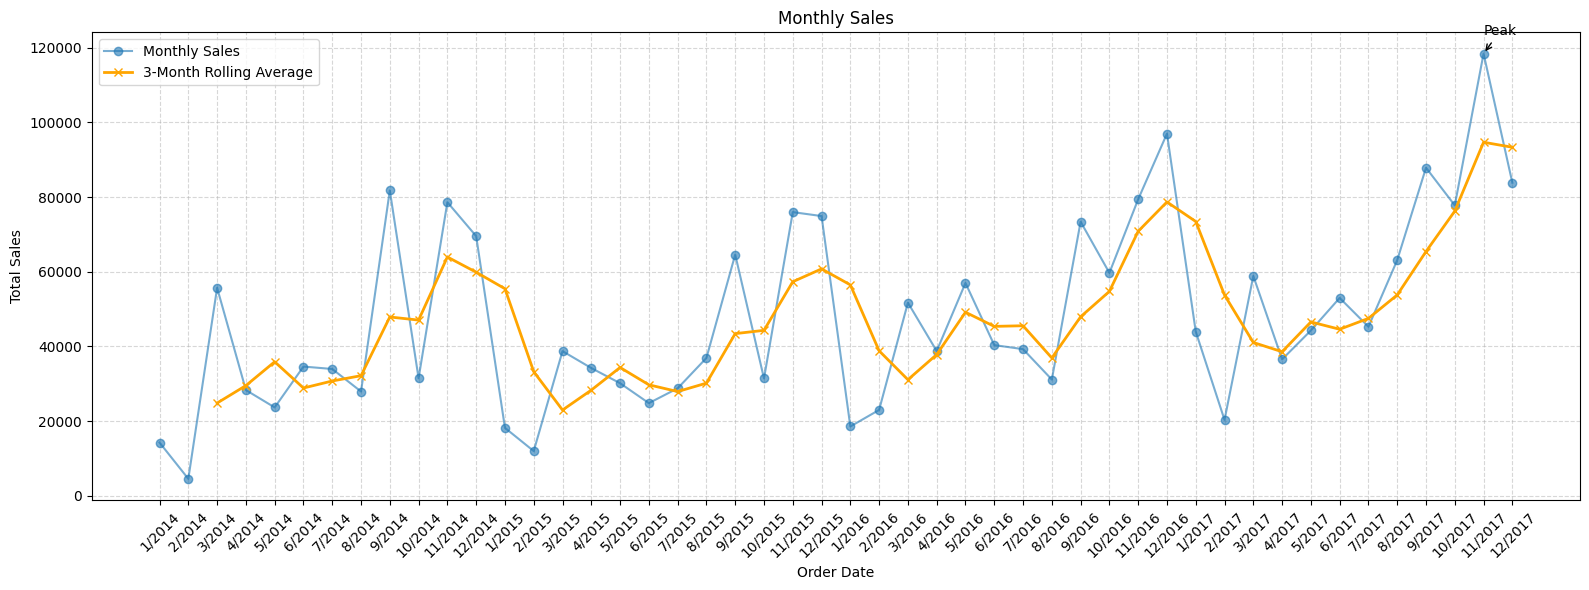

In [6]:
# 4) Visualize data using matplotlib or seaborn
# monthly_incomes[order_date][total_sales] ================ top_products ('Avery Non-Stick Binders', 71)
import matplotlib.pyplot as plt

dates = [entry['order_date'] for entry in monthly_incomes]
sales = [entry['total_sales'] for entry in monthly_incomes]

# Calculate 3-month rolling average
rolling_avg = [None, None]  # first two values can't have 3-month avg
for i in range(2, len(sales)):
    avg = sum(sales[i-2:i+1]) / 3
    rolling_avg.append(avg)

plt.figure(figsize=(16, 6))  # Make the plot wider and taller
plt.plot(dates, sales, marker='o', label='Monthly Sales', alpha=0.6) # marks with circles individual months to make it more visible.
plt.plot(dates, rolling_avg, label="3-Month Rolling Average", linewidth=2, color='orange', marker='x')

# Highlight the highest month
max_index = sales.index(max(sales))
plt.annotate('Peak', xy=(dates[max_index], sales[max_index]),
             xytext=(dates[max_index], sales[max_index] + 5000),
             arrowprops=dict(facecolor='red', arrowstyle='->'))

plt.title('Monthly Sales')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45) # Rotate x-axis labels by 45 degrees
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend() # Shows the labels from the .plot()
plt.tight_layout()       # Adjust layout to prevent label clipping
plt.show()

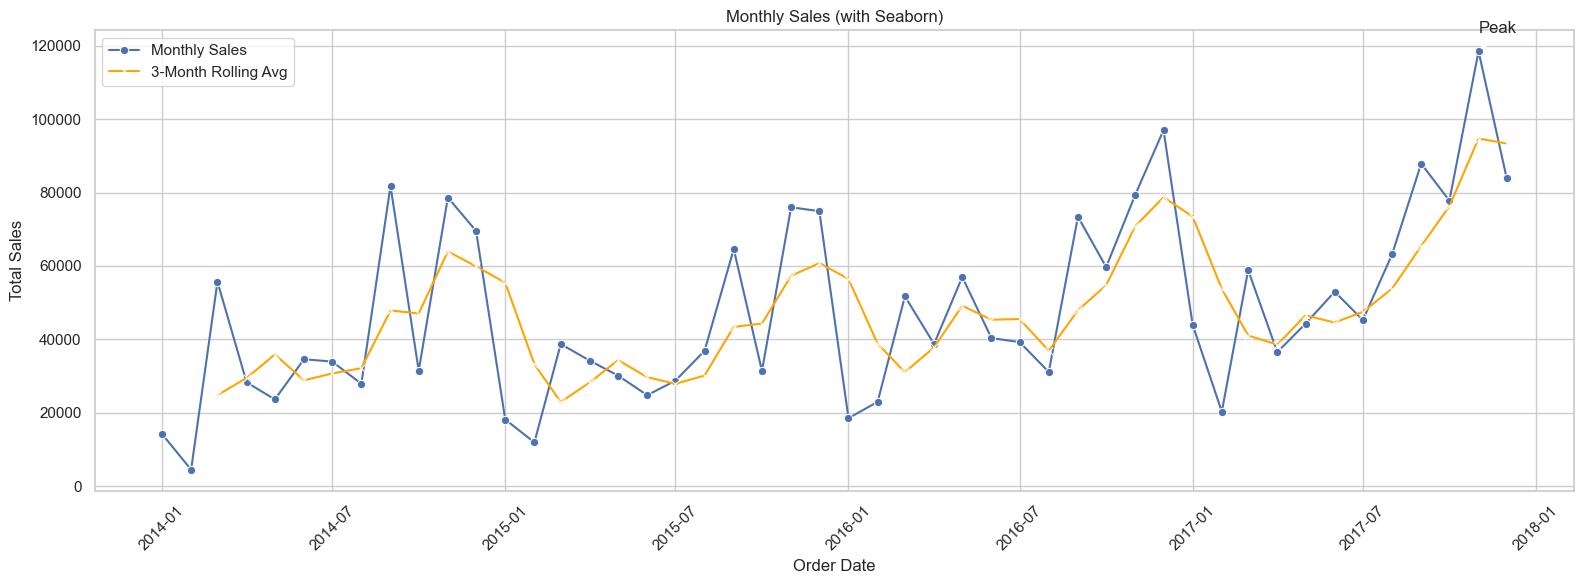

In [7]:
# using Seaborn
import pandas as pd
import seaborn as sns
from datetime import datetime

# Convert list of dicts to DataFrame
df = pd.DataFrame(monthly_incomes)

# Convert 'order_date' to datetime (for proper sorting and plotting)
df['order_date'] = pd.to_datetime(df['order_date'], format="%m/%Y")

# Sort by date
df = df.sort_values('order_date')

# Create rolling average
df['rolling_avg'] = df['total_sales'].rolling(window=3).mean()

plt.figure(figsize=(16, 6))
sns.set_theme(style="whitegrid")  # Cleaner background

# Lineplot with markers
sns.lineplot(data=df, x='order_date', y='total_sales', label='Monthly Sales', marker='o')
sns.lineplot(data=df, x='order_date', y='rolling_avg', label='3-Month Rolling Avg', marker='x', color='orange')

# Annotate peak
max_row = df.loc[df['total_sales'].idxmax()]
plt.annotate('Peak', xy=(max_row['order_date'], max_row['total_sales']),
             xytext=(max_row['order_date'], max_row['total_sales'] + 5000),
             arrowprops=dict(facecolor='red', arrowstyle='->'))

# Labels and styling
plt.title('Monthly Sales (with Seaborn)')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
# 5) Export cleaned tables for later ML use
final_df = pd.DataFrame(monthly_incomes)
final_df.to_csv('../data/monthly_incomes_clean.csv', index=False)